In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import numpy as np


import pickle


In [2]:
df = pd.read_csv('bioactivity_Finaldataset_3class_pIC50_pubchem_fp.csv')

In [3]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.575118
5099,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.130768
5100,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.292430
5101,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.903090


In [4]:
X = df.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5099,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5100,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5101,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y = df.iloc[:,-1]
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
5098    3.575118
5099    6.130768
5100    6.292430
5101    3.903090
5102    4.000000
Name: pIC50, Length: 5103, dtype: float64

Remove low variance features

In [6]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP37,...,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,1,1,0,0,0,1,1,1,0,0,...,0,0,1,1,1,1,1,1,0,0
5099,0,1,0,1,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5100,0,1,0,1,0,1,1,1,1,0,...,0,1,0,1,0,1,0,1,0,1
5101,0,1,0,0,0,1,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1


In [7]:
X.to_csv('descriptor_list.csv', index = False)

In [8]:

  
# create a regressor object
model1 = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
model1.fit(X, Y)
r2 = model1.score(X, Y)
r2

0.9019001298861105

In [9]:
Y_pred1 = model1.predict(X)
Y_pred1

array([6.12493874, 7.        , 4.30103   , ..., 6.29242982, 3.90308999,
       4.        ])

In [10]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred1))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred1))

Mean squared error (MSE): 0.25
Coefficient of determination (R^2): 0.90


Text(0.5, 0, 'Experimental pIC50')

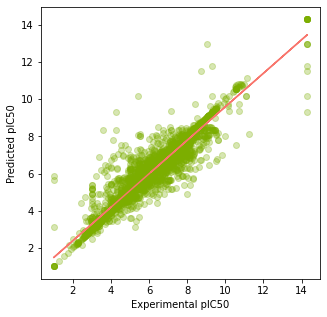

In [11]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred1, c="#7CAE00", alpha=0.3)


z = np.polyfit(Y, Y_pred1, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

In [12]:
pickle.dump(model1, open('DecisionTreeAcetylcholinesterase_model.pkl', 'wb'))

# RandomForestRegressor

In [13]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8669148776285185

In [14]:
Y_pred = model.predict(X)
Y_pred

array([5.92255628, 6.62978456, 4.83123394, ..., 6.48646803, 4.23823683,
       4.29788595])

In [15]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.35
Coefficient of determination (R^2): 0.87


Text(0.5, 0, 'Experimental pIC50')

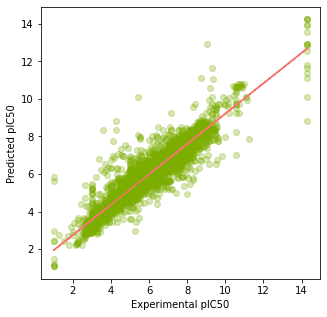

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)


z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

In [17]:
pickle.dump(model, open('RandomForestAcetylcholinesterase_model.pkl', 'wb'))

In [18]:
def desc_calc():
    # Performs the descriptor calculation
    bashCommand = "java -Xms2G -Xmx2G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv"
    process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    os.remove('molecule.smi')

In [19]:
desc = pd.read_csv('descriptors_output.csv')
Xlist = list(pd.read_csv('descriptor_list.csv').columns)
input_data = desc[Xlist]

In [20]:
input_data

,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP37,...,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,0,0,1,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
load_model = pickle.load(open('RandomForestAcetylcholinesterase_model.pkl', 'rb'))
# Apply model to make predictions
prediction = load_model.predict(input_data)


In [22]:
prediction

array([5.95268265, 4.83123394, 5.92255628, 6.62978456, 6.31225779])